In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# CIFAR 10 DATASET

In [ ]:
def inception_module(x,
                     filters_1x1,
                     filters_3x3_reduce,
                     filters_3x3,
                     filters_5x5_reduce,
                     filters_5x5,
                     filters_pool_proj,
                     name=None):
    
    conv_1x1 = Conv2D(filters_1x1, (1, 1), padding='same', activation='relu', kernel_initializer=kernel_init, bias_initializer=bias_init)(x)
    
    conv_3x3 = Conv2D(filters_3x3_reduce, (1, 1), padding='same', activation='relu', kernel_initializer=kernel_init, bias_initializer=bias_init)(x)
    conv_3x3 = Conv2D(filters_3x3, (3, 3), padding='same', activation='relu', kernel_initializer=kernel_init, bias_initializer=bias_init)(conv_3x3)

    conv_5x5 = Conv2D(filters_5x5_reduce, (1, 1), padding='same', activation='relu', kernel_initializer=kernel_init, bias_initializer=bias_init)(x)
    conv_5x5 = Conv2D(filters_5x5, (5, 5), padding='same', activation='relu', kernel_initializer=kernel_init, bias_initializer=bias_init)(conv_5x5)

    pool_proj = MaxPool2D((3, 3), strides=(1, 1), padding='same')(x)
    pool_proj = Conv2D(filters_pool_proj, (1, 1), padding='same', activation='relu', kernel_initializer=kernel_init, bias_initializer=bias_init)(pool_proj)

    output = concatenate([conv_1x1, conv_3x3, conv_5x5, pool_proj], axis=3, name=name)
    
    return output

In [ ]:
kernel_init = keras.initializers.glorot_uniform()
bias_init = keras.initializers.Constant(value=0.2)

In [ ]:
input_layer = Input(shape=(224, 224, 3))

x = Conv2D(64, (7, 7), padding='same', strides=(2, 2), activation='relu', name='conv_1_7x7/2', kernel_initializer=kernel_init, bias_initializer=bias_init)(input_layer)
x = MaxPool2D((3, 3), padding='same', strides=(2, 2), name='max_pool_1_3x3/2')(x)
x = Conv2D(64, (1, 1), padding='same', strides=(1, 1), activation='relu', name='conv_2a_3x3/1')(x)
x = Conv2D(192, (3, 3), padding='same', strides=(1, 1), activation='relu', name='conv_2b_3x3/1')(x)
x = MaxPool2D((3, 3), padding='same', strides=(2, 2), name='max_pool_2_3x3/2')(x)

x = inception_module(x,
                     filters_1x1=64,
                     filters_3x3_reduce=96,
                     filters_3x3=128,
                     filters_5x5_reduce=16,
                     filters_5x5=32,
                     filters_pool_proj=32,
                     name='inception_3a')

x = inception_module(x,
                     filters_1x1=128,
                     filters_3x3_reduce=128,
                     filters_3x3=192,
                     filters_5x5_reduce=32,
                     filters_5x5=96,
                     filters_pool_proj=64,
                     name='inception_3b')

x = MaxPool2D((3, 3), padding='same', strides=(2, 2), name='max_pool_3_3x3/2')(x)

x = inception_module(x,
                     filters_1x1=192,
                     filters_3x3_reduce=96,
                     filters_3x3=208,
                     filters_5x5_reduce=16,
                     filters_5x5=48,
                     filters_pool_proj=64,
                     name='inception_4a')


x1 = AveragePooling2D((5, 5), strides=3)(x)
x1 = Conv2D(128, (1, 1), padding='same', activation='relu')(x1)
x1 = Flatten()(x1)
x1 = Dense(1024, activation='relu')(x1)
x1 = Dropout(0.7)(x1)
x1 = Dense(10, activation='softmax', name='auxilliary_output_1')(x1)

x = inception_module(x,
                     filters_1x1=160,
                     filters_3x3_reduce=112,
                     filters_3x3=224,
                     filters_5x5_reduce=24,
                     filters_5x5=64,
                     filters_pool_proj=64,
                     name='inception_4b')

x = inception_module(x,
                     filters_1x1=128,
                     filters_3x3_reduce=128,
                     filters_3x3=256,
                     filters_5x5_reduce=24,
                     filters_5x5=64,
                     filters_pool_proj=64,
                     name='inception_4c')

x = inception_module(x,
                     filters_1x1=112,
                     filters_3x3_reduce=144,
                     filters_3x3=288,
                     filters_5x5_reduce=32,
                     filters_5x5=64,
                     filters_pool_proj=64,
                     name='inception_4d')


x2 = AveragePooling2D((5, 5), strides=3)(x)
x2 = Conv2D(128, (1, 1), padding='same', activation='relu')(x2)
x2 = Flatten()(x2)
x2 = Dense(1024, activation='relu')(x2)
x2 = Dropout(0.7)(x2)
x2 = Dense(10, activation='softmax', name='auxilliary_output_2')(x2)

x = inception_module(x,
                     filters_1x1=256,
                     filters_3x3_reduce=160,
                     filters_3x3=320,
                     filters_5x5_reduce=32,
                     filters_5x5=128,
                     filters_pool_proj=128,
                     name='inception_4e')

x = MaxPool2D((3, 3), padding='same', strides=(2, 2), name='max_pool_4_3x3/2')(x)

x = inception_module(x,
                     filters_1x1=256,
                     filters_3x3_reduce=160,
                     filters_3x3=320,
                     filters_5x5_reduce=32,
                     filters_5x5=128,
                     filters_pool_proj=128,
                     name='inception_5a')

x = inception_module(x,
                     filters_1x1=384,
                     filters_3x3_reduce=192,
                     filters_3x3=384,
                     filters_5x5_reduce=48,
                     filters_5x5=128,
                     filters_pool_proj=128,
                     name='inception_5b')

x = GlobalAveragePooling2D(name='avg_pool_5_3x3/1')(x)

x = Dropout(0.4)(x)

x = Dense(10, activation='softmax', name='output')(x)


In [ ]:
import keras
from keras.layers.core import Layer
import keras.backend as K
import tensorflow as tf
from keras.datasets import cifar10

In [ ]:
from keras.models import Model

from keras.layers import Conv2D, MaxPool2D,  \
    Dropout, Dense, Input, concatenate,      \
    GlobalAveragePooling2D, AveragePooling2D,\
    Flatten

import cv2 
import numpy as np 
from keras.datasets import cifar10 
from keras import backend as K 
from keras.utils import np_utils

import math 
from tensorflow.keras.optimizers import SGD 
from keras.callbacks import LearningRateScheduler

In [ ]:
num_classes = 10

def load_cifar10_data(img_rows, img_cols):

    # Load cifar10 training and validation sets
    (X_train, Y_train), (X_valid, Y_valid) = cifar10.load_data()

    X_train = X_train[0:5000]
    Y_train = Y_train[0:5000]
    X_valid = X_valid[0:2000]
    Y_valid = Y_valid[0:2000]

    # Resize training images
    X_train = np.array([cv2.resize(img, (img_rows,img_cols)) for img in X_train[:,:,:,:]])
    X_valid = np.array([cv2.resize(img, (img_rows,img_cols)) for img in X_valid[:,:,:,:]])

    # Transform targets to keras compatible format
    Y_train = np_utils.to_categorical(Y_train, num_classes)
    Y_valid = np_utils.to_categorical(Y_valid, num_classes)
    
    X_train = X_train.astype('float32')
    X_valid = X_valid.astype('float32')

    # preprocess data
    X_train = X_train / 255.0
    X_valid = X_valid / 255.0

    return X_train, Y_train, X_valid, Y_valid


In [ ]:
X_train, y_train, X_test, y_test = load_cifar10_data(224, 224)


In [ ]:
model = Model(input_layer, [x, x1, x2], name='inception_v1')

In [ ]:
model.summary()

Model: "inception_v1"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 224, 224, 3) 0                                            
__________________________________________________________________________________________________
conv_1_7x7/2 (Conv2D)           (None, 112, 112, 64) 9472        input_1[0][0]                    
__________________________________________________________________________________________________
max_pool_1_3x3/2 (MaxPooling2D) (None, 56, 56, 64)   0           conv_1_7x7/2[0][0]               
__________________________________________________________________________________________________
conv_2a_3x3/1 (Conv2D)          (None, 56, 56, 64)   4160        max_pool_1_3x3/2[0][0]           
_______________________________________________________________________________________

In [ ]:
epochs = 10
initial_lrate = 0.01

def decay(epoch, steps=100):
    initial_lrate = 0.01
    drop = 0.96
    epochs_drop = 8
    lrate = initial_lrate * math.pow(drop, math.floor((1+epoch)/epochs_drop))
    return lrate

sgd = SGD(learning_rate=initial_lrate, momentum=0.9, nesterov=False)

lr_sc = LearningRateScheduler(decay, verbose=1)

model.compile(loss=['categorical_crossentropy', 'categorical_crossentropy', 'categorical_crossentropy'], loss_weights=[1, 0.3, 0.3], optimizer=sgd, metrics=['accuracy'])

In [ ]:
history = model.fit(X_train, [y_train, y_train, y_train], validation_data=(X_test, [y_test, y_test, y_test]), epochs=epochs, batch_size=256, callbacks=[lr_sc])


Epoch 1/10

Epoch 00001: LearningRateScheduler setting learning rate to 0.01.
20/20 [==============================] - 111s 3s/step - loss: 3.8503 - output_loss: 2.4237 - auxilliary_output_1_loss: 2.3730 - auxilliary_output_2_loss: 2.3825 - output_accuracy: 0.1000 - auxilliary_output_1_accuracy: 0.1092 - auxilliary_output_2_accuracy: 0.0862 - val_loss: 3.6912 - val_output_loss: 2.3097 - val_auxilliary_output_1_loss: 2.3023 - val_auxilliary_output_2_loss: 2.3027 - val_output_accuracy: 0.0990 - val_auxilliary_output_1_accuracy: 0.0990 - val_auxilliary_output_2_accuracy: 0.1085
Epoch 2/10

Epoch 00002: LearningRateScheduler setting learning rate to 0.01.
20/20 [==============================] - 38s 2s/step - loss: 3.7276 - output_loss: 2.3437 - auxilliary_output_1_loss: 2.3055 - auxilliary_output_2_loss: 2.3076 - output_accuracy: 0.0990 - auxilliary_output_1_accuracy: 0.0982 - auxilliary_output_2_accuracy: 0.1060 - val_loss: 3.7074 - val_output_loss: 2.3267 - val_auxilliary_output_1_loss:

# MNIST DATASET

In [ ]:
import tensorflow as tf
import matplotlib.pyplot as plt
from tensorflow.keras import datasets, layers, models, losses, Model

In [ ]:
(x_train, y_train), (x_test, y_test)=tf.keras.datasets.mnist.load_data()
x_train = tf.pad(x_train, [[0, 0], [2,2], [2,2]])/255
x_test = tf.pad(x_test, [[0, 0], [2,2], [2,2]])/255
x_train = tf.expand_dims(x_train, axis=3, name=None)
x_test = tf.expand_dims(x_test, axis=3, name=None)
x_train = tf.repeat(x_train, 3, axis=3)
x_test = tf.repeat(x_test, 3, axis=3)
x_val = x_train[-2000:,:,:]
y_val = y_train[-2000:]
x_train = x_train[:-2000,:,:]
y_train = y_train[:-2000]

11501568/11490434 [==============================] - 0s 0us/step


In [ ]:
def inception(x,
              filters_1x1,
              filters_3x3_reduce,
              filters_3x3,
              filters_5x5_reduce,
              filters_5x5,
              filters_pool):
  path1 = layers.Conv2D(filters_1x1, (1, 1), padding='same', activation='relu')(x)

  path2 = layers.Conv2D(filters_3x3_reduce, (1, 1), padding='same', activation='relu')(x)
  path2 = layers.Conv2D(filters_3x3, (1, 1), padding='same', activation='relu')(path2)

  path3 = layers.Conv2D(filters_5x5_reduce, (1, 1), padding='same', activation='relu')(x)
  path3 = layers.Conv2D(filters_5x5, (1, 1), padding='same', activation='relu')(path3)

  path4 = layers.MaxPool2D((3, 3), strides=(1, 1), padding='same')(x)
  path4 = layers.Conv2D(filters_pool, (1, 1), padding='same', activation='relu')(path4)

  return tf.concat([path1, path2, path3, path4], axis=3)


In [ ]:
inp = layers.Input(shape=(32, 32, 3))
input_tensor = layers.experimental.preprocessing.Resizing(224, 224, interpolation="bilinear", input_shape=x_train.shape[1:])(inp)

x = layers.Conv2D(64, 7, strides=2, padding='same', activation='relu')(input_tensor)
x = layers.MaxPooling2D(3, strides=2)(x)

x = layers.Conv2D(64, 1, strides=1, padding='same', activation='relu')(x)
x = layers.Conv2D(192, 3, strides=1, padding='same', activation='relu')(x)

x = layers.MaxPooling2D(3, strides=2)(x)

x = inception(x,
              filters_1x1=64,
              filters_3x3_reduce=96,
              filters_3x3=128,
              filters_5x5_reduce=16,
              filters_5x5=32,
              filters_pool=32)

x = inception(x,
              filters_1x1=128,
              filters_3x3_reduce=128,
              filters_3x3=192,
              filters_5x5_reduce=32,
              filters_5x5=96,
              filters_pool=64)

x = layers.MaxPooling2D(3, strides=2)(x)

x = inception(x,
              filters_1x1=192,
              filters_3x3_reduce=96,
              filters_3x3=208,
              filters_5x5_reduce=16,
              filters_5x5=48,
              filters_pool=64)

aux1 = layers.AveragePooling2D((5, 5), strides=3)(x)
aux1 = layers.Conv2D(128, 1, padding='same', activation='relu')(aux1)
aux1 = layers.Flatten()(aux1)
aux1 = layers.Dense(1024, activation='relu')(aux1)
aux1 = layers.Dropout(0.7)(aux1)
aux1 = layers.Dense(10, activation='softmax')(aux1)

x = inception(x,
              filters_1x1=160,
              filters_3x3_reduce=112,
              filters_3x3=224,
              filters_5x5_reduce=24,
              filters_5x5=64,
              filters_pool=64)

x = inception(x,
              filters_1x1=128,
              filters_3x3_reduce=128,
              filters_3x3=256,
              filters_5x5_reduce=24,
              filters_5x5=64,
              filters_pool=64)

x = inception(x,
              filters_1x1=112,
              filters_3x3_reduce=144,
              filters_3x3=288,
              filters_5x5_reduce=32,
              filters_5x5=64,
              filters_pool=64)

aux2 = layers.AveragePooling2D((5, 5), strides=3)(x)
aux2 = layers.Conv2D(128, 1, padding='same', activation='relu')(aux2)
aux2 = layers.Flatten()(aux2)
aux2 = layers.Dense(1024, activation='relu')(aux2)
aux2 = layers.Dropout(0.7)(aux2)
aux2 = layers.Dense(10, activation='softmax')(aux2)

x = inception(x,
              filters_1x1=256,
              filters_3x3_reduce=160,
              filters_3x3=320,
              filters_5x5_reduce=32,
              filters_5x5=128,
              filters_pool=128)

x = layers.MaxPooling2D(3, strides=2)(x)

x = inception(x,
              filters_1x1=256,
              filters_3x3_reduce=160,
              filters_3x3=320,
              filters_5x5_reduce=32,
              filters_5x5=128,
              filters_pool=128)

x = inception(x,
              filters_1x1=384,
              filters_3x3_reduce=192,
              filters_3x3=384,
              filters_5x5_reduce=48,
              filters_5x5=128,
              filters_pool=128)

x = layers.GlobalAveragePooling2D()(x)

x = layers.Dropout(0.4)(x)
out = layers.Dense(10, activation='softmax')(x)

In [ ]:
model = Model(inputs = inp, outputs = [out, aux1, aux2])

In [ ]:
model.compile(optimizer='adam', loss=[losses.sparse_categorical_crossentropy, losses.sparse_categorical_crossentropy, losses.sparse_categorical_crossentropy], loss_weights=[1, 0.3, 0.3], metrics=['accuracy'])


In [ ]:
history = model.fit(x_train, [y_train, y_train, y_train], validation_data=(x_val, [y_val, y_val, y_val]), batch_size=64, epochs=10)


Epoch 1/10
907/907 [==============================] - 333s 367ms/step - loss: 0.1901 - dense_6_loss: 0.1282 - dense_3_loss: 0.0972 - dense_5_loss: 0.1092 - dense_6_accuracy: 0.9620 - dense_3_accuracy: 0.9702 - dense_5_accuracy: 0.9671 - val_loss: 0.1184 - val_dense_6_loss: 0.0799 - val_dense_3_loss: 0.0618 - val_dense_5_loss: 0.0665 - val_dense_6_accuracy: 0.9750 - val_dense_3_accuracy: 0.9835 - val_dense_5_accuracy: 0.9825
Epoch 2/10
907/907 [==============================] - 333s 367ms/step - loss: 0.1405 - dense_6_loss: 0.0927 - dense_3_loss: 0.0753 - dense_5_loss: 0.0842 - dense_6_accuracy: 0.9723 - dense_3_accuracy: 0.9773 - dense_5_accuracy: 0.9744 - val_loss: 0.0731 - val_dense_6_loss: 0.0478 - val_dense_3_loss: 0.0377 - val_dense_5_loss: 0.0467 - val_dense_6_accuracy: 0.9865 - val_dense_3_accuracy: 0.9915 - val_dense_5_accuracy: 0.9870
Epoch 3/10
907/907 [==============================] - 333s 367ms/step - loss: 0.1204 - dense_6_loss: 0.0804 - dense_3_loss: 0.0632 - dense_5_los

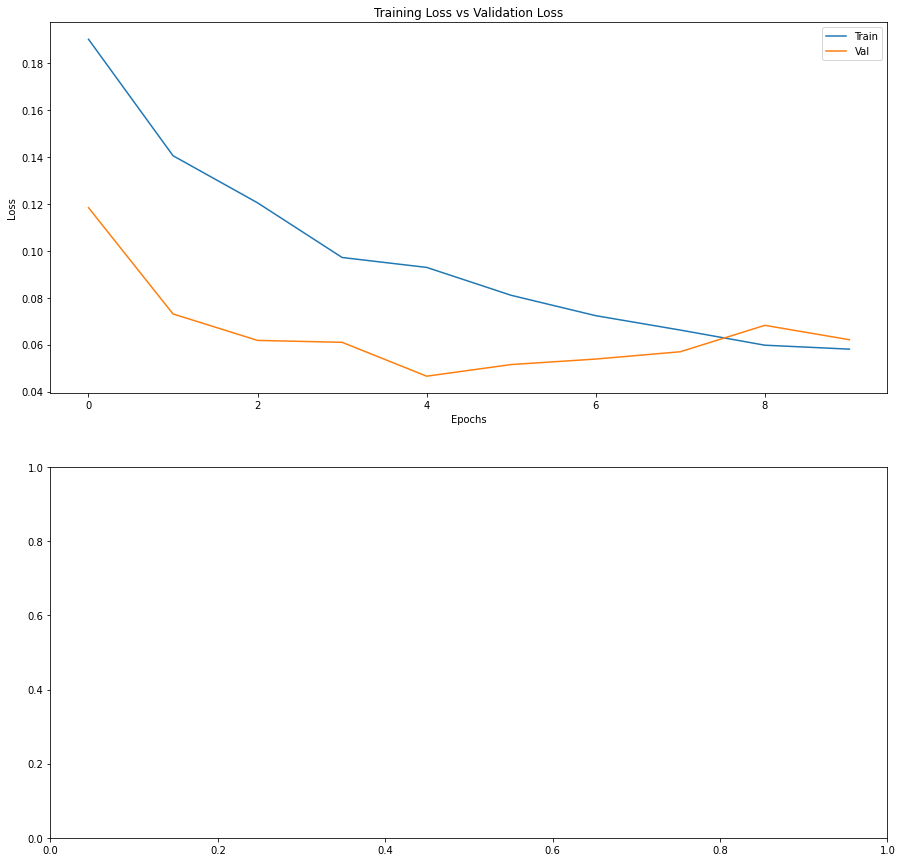

In [ ]:
fig, axs = plt.subplots(2, 1, figsize=(15,15))

axs[0].plot(history.history['loss'])
axs[0].plot(history.history['val_loss'])
axs[0].title.set_text('Training Loss vs Validation Loss')
axs[0].set_xlabel('Epochs')
axs[0].set_ylabel('Loss')
axs[0].legend(['Train','Val'])


In [ ]:
model.evaluate(x_test, y_test)


313/313 [==============================] - 24s 69ms/step - loss: 0.0543 - dense_6_loss: 0.0382 - dense_3_loss: 0.0257 - dense_5_loss: 0.0279 - dense_6_accuracy: 0.9874 - dense_3_accuracy: 0.9926 - dense_5_accuracy: 0.9903


[0.05425573140382767,
 0.03818700090050697,
 0.02569129876792431,
 0.027871087193489075,
 0.9873999953269958,
 0.9926000237464905,
 0.9902999997138977]

# SAVEE Dataset

In [ ]:
!unzip "/content/drive/MyDrive/SaveeDataset.zip"

In [ ]:
import librosa
import numpy as np

input_length = 16000*5

batch_size = 32

n_mels = 320

def preprocess_audio_mel_T(audio, sample_rate=16000, window_size=20, #log_specgram
                 step_size=10, eps=1e-10):

    mel_spec = librosa.feature.melspectrogram(y=audio, sr=sample_rate, n_mels= n_mels)
    mel_db = (librosa.power_to_db(mel_spec, ref=np.max) + 40)/40

    return mel_db.T


def load_audio_file(file_path, input_length=input_length):
  data = librosa.core.load(file_path, sr=16000)[0] #, sr=16000
  if len(data)>input_length:
    max_offset = len(data)-input_length
    
    offset = np.random.randint(max_offset)
    
    data = data[offset:(input_length+offset)]
            
  else:
    if input_length > len(data):
      max_offset = input_length - len(data)

      offset = np.random.randint(max_offset)
    else:
      offset = 0
    data = np.pad(data, (offset, input_length - len(data) - offset), "constant")
    
  data = preprocess_audio_mel_T(data)
  return data

In [ ]:
# Preprocessing the dataset
import os
from scipy.io import wavfile
import librosa
import matplotlib.pyplot as plt
import numpy as np
import cv2

rootDirectory = "/content/AudioData/"
personNames = ["DC","JE","JK","KL"]

classes = ["a" , "d" , "f", "h", "n", "sa" , "su" ]

X = list()
y = list()

for person in personNames:
  directory = os.path.join(rootDirectory,person)
  for filename in os.listdir(directory):
    filePath = os.path.join(directory, filename)
    a = load_audio_file(file_path=filePath)
    data = cv2.merge([a,a,a])
    if(filename[0:1] in classes):
      X.append(data)
      y.append(classes.index(filename[0:1]))
    elif(filename[0:2] in classes):
      X.append(data)
      y.append(classes.index(filename[0:2]))

In [ ]:
X = np.asarray(X, dtype=np.float32)
y = np.asarray(y, dtype=np.float32)

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf

# dataset preparation

from tensorflow.keras import datasets,layers,models
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, train_size= 0.6 ,random_state=10)

In [ ]:
import tensorflow as tf
import matplotlib.pyplot as plt
from tensorflow.keras import datasets, layers, models, losses, Model

In [ ]:
def inception(x,
              filters_1x1,
              filters_3x3_reduce,
              filters_3x3,
              filters_5x5_reduce,
              filters_5x5,
              filters_pool):
  path1 = layers.Conv2D(filters_1x1, (1, 1), padding='same', activation='relu')(x)

  path2 = layers.Conv2D(filters_3x3_reduce, (1, 1), padding='same', activation='relu')(x)
  path2 = layers.Conv2D(filters_3x3, (1, 1), padding='same', activation='relu')(path2)

  path3 = layers.Conv2D(filters_5x5_reduce, (1, 1), padding='same', activation='relu')(x)
  path3 = layers.Conv2D(filters_5x5, (1, 1), padding='same', activation='relu')(path3)

  path4 = layers.MaxPool2D((3, 3), strides=(1, 1), padding='same')(x)
  path4 = layers.Conv2D(filters_pool, (1, 1), padding='same', activation='relu')(path4)

  return tf.concat([path1, path2, path3, path4], axis=3)


In [ ]:
inp = layers.Input(shape=(157, 320, 3))
input_tensor = layers.experimental.preprocessing.Resizing(224, 224, interpolation="bilinear", input_shape=X_train.shape[1:])(inp)

x = layers.Conv2D(64, 7, strides=2, padding='same', activation='relu')(input_tensor)
x = layers.MaxPooling2D(3, strides=2)(x)

x = layers.Conv2D(64, 1, strides=1, padding='same', activation='relu')(x)
x = layers.Conv2D(192, 3, strides=1, padding='same', activation='relu')(x)

x = layers.MaxPooling2D(3, strides=2)(x)

x = inception(x,
              filters_1x1=64,
              filters_3x3_reduce=96,
              filters_3x3=128,
              filters_5x5_reduce=16,
              filters_5x5=32,
              filters_pool=32)

x = inception(x,
              filters_1x1=128,
              filters_3x3_reduce=128,
              filters_3x3=192,
              filters_5x5_reduce=32,
              filters_5x5=96,
              filters_pool=64)

x = layers.MaxPooling2D(3, strides=2)(x)

x = inception(x,
              filters_1x1=192,
              filters_3x3_reduce=96,
              filters_3x3=208,
              filters_5x5_reduce=16,
              filters_5x5=48,
              filters_pool=64)

aux1 = layers.AveragePooling2D((5, 5), strides=3)(x)
aux1 = layers.Conv2D(128, 1, padding='same', activation='relu')(aux1)
aux1 = layers.Flatten()(aux1)
aux1 = layers.Dense(1024, activation='relu')(aux1)
aux1 = layers.Dropout(0.7)(aux1)
aux1 = layers.Dense(10, activation='softmax')(aux1)

x = inception(x,
              filters_1x1=160,
              filters_3x3_reduce=112,
              filters_3x3=224,
              filters_5x5_reduce=24,
              filters_5x5=64,
              filters_pool=64)

x = inception(x,
              filters_1x1=128,
              filters_3x3_reduce=128,
              filters_3x3=256,
              filters_5x5_reduce=24,
              filters_5x5=64,
              filters_pool=64)

x = inception(x,
              filters_1x1=112,
              filters_3x3_reduce=144,
              filters_3x3=288,
              filters_5x5_reduce=32,
              filters_5x5=64,
              filters_pool=64)

aux2 = layers.AveragePooling2D((5, 5), strides=3)(x)
aux2 = layers.Conv2D(128, 1, padding='same', activation='relu')(aux2)
aux2 = layers.Flatten()(aux2)
aux2 = layers.Dense(1024, activation='relu')(aux2)
aux2 = layers.Dropout(0.7)(aux2)
aux2 = layers.Dense(10, activation='softmax')(aux2)

x = inception(x,
              filters_1x1=256,
              filters_3x3_reduce=160,
              filters_3x3=320,
              filters_5x5_reduce=32,
              filters_5x5=128,
              filters_pool=128)

x = layers.MaxPooling2D(3, strides=2)(x)

x = inception(x,
              filters_1x1=256,
              filters_3x3_reduce=160,
              filters_3x3=320,
              filters_5x5_reduce=32,
              filters_5x5=128,
              filters_pool=128)

x = inception(x,
              filters_1x1=384,
              filters_3x3_reduce=192,
              filters_3x3=384,
              filters_5x5_reduce=48,
              filters_5x5=128,
              filters_pool=128)

x = layers.GlobalAveragePooling2D()(x)

x = layers.Dropout(0.4)(x)
out = layers.Dense(10, activation='softmax')(x)

In [ ]:
model = Model(inputs = inp, outputs = [out, aux1, aux2])

model.compile(optimizer='adam', loss=[losses.sparse_categorical_crossentropy, losses.sparse_categorical_crossentropy, losses.sparse_categorical_crossentropy], loss_weights=[1, 0.3, 0.3], metrics=['accuracy'])


In [ ]:
history = model.fit(X_train, [y_train, y_train, y_train], validation_data=(X_test, [y_test, y_test, y_test]), batch_size=64, epochs=30)

Epoch 1/30
5/5 [==============================] - 43s 1s/step - loss: 3.7075 - dense_4_loss: 2.3287 - dense_1_loss: 2.2312 - dense_3_loss: 2.3650 - dense_4_accuracy: 0.1979 - dense_1_accuracy: 0.1771 - dense_3_accuracy: 0.1840 - val_loss: 3.3708 - val_dense_4_loss: 2.1198 - val_dense_1_loss: 2.0493 - val_dense_3_loss: 2.1207 - val_dense_4_accuracy: 0.1042 - val_dense_1_accuracy: 0.1354 - val_dense_3_accuracy: 0.1042
Epoch 2/30
5/5 [==============================] - 2s 512ms/step - loss: 3.4439 - dense_4_loss: 2.1523 - dense_1_loss: 2.1182 - dense_3_loss: 2.1872 - dense_4_accuracy: 0.0938 - dense_1_accuracy: 0.1354 - dense_3_accuracy: 0.1111 - val_loss: 3.3694 - val_dense_4_loss: 2.0954 - val_dense_1_loss: 2.0870 - val_dense_3_loss: 2.1597 - val_dense_4_accuracy: 0.1302 - val_dense_1_accuracy: 0.1302 - val_dense_3_accuracy: 0.1042
Epoch 3/30
5/5 [==============================] - 2s 510ms/step - loss: 3.2806 - dense_4_loss: 2.0352 - dense_1_loss: 2.0429 - dense_3_loss: 2.1084 - dense_4_

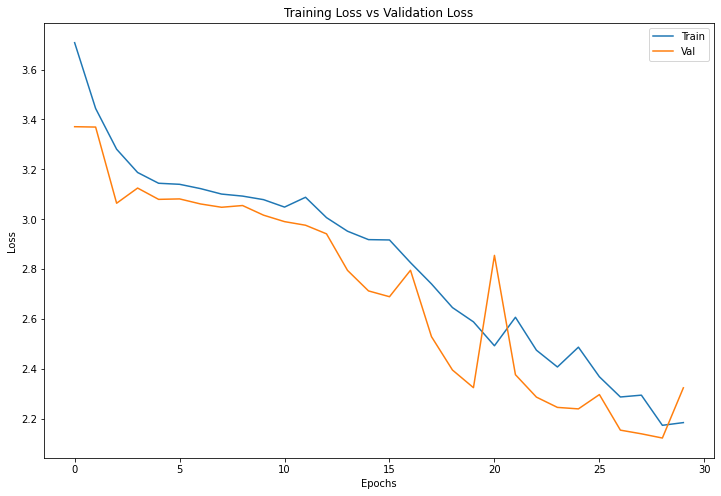

In [ ]:
fig, axs = plt.subplots(figsize=(12,8))

axs.plot(history.history['loss'])
axs.plot(history.history['val_loss'])
axs.title.set_text('Training Loss vs Validation Loss')
axs.set_xlabel('Epochs')
axs.set_ylabel('Loss')
axs.legend(['Train','Val'])

plt.show()

In [ ]:
model.evaluate(X_test, y_test)


6/6 [==============================] - 1s 92ms/step - loss: 2.3244 - dense_4_loss: 1.4581 - dense_1_loss: 1.4512 - dense_3_loss: 1.4365 - dense_4_accuracy: 0.3542 - dense_1_accuracy: 0.3333 - dense_3_accuracy: 0.3802


[2.324364423751831,
 1.458065390586853,
 1.4511628150939941,
 1.4365006685256958,
 0.3541666567325592,
 0.3333333432674408,
 0.3802083432674408]

# EmoDB Dataset

In [ ]:
!unzip "/content/drive/MyDrive/EmoDB.zip"

Archive:  /content/drive/MyDrive/EmoDB.zip
   creating: lablaut/
  inflating: lablaut/14a04Lbxx.lablaut  
  inflating: lablaut/03a07Fbxx.lablaut  
  inflating: lablaut/16b03Faxx.lablaut  
  inflating: lablaut/15a05Lbxx.lablaut  
  inflating: lablaut/16a02Lbxx.lablaut  
  inflating: lablaut/14a04Aaxx.lablaut  
  inflating: lablaut/12b03Taxx.lablaut  
  inflating: lablaut/16a05Laxx.lablaut  
  inflating: lablaut/16b03Taxx.lablaut  
  inflating: lablaut/11a05Fcxx.lablaut  
  inflating: lablaut/03a02Taxx.lablaut  
  inflating: lablaut/09b03Edxx.lablaut  
  inflating: lablaut/12a01Fbxx.lablaut  
  inflating: lablaut/10a02Faxx.lablaut  
  inflating: lablaut/08a04Tbxx.lablaut  
  inflating: lablaut/09a05Tbxx.lablaut  
  inflating: lablaut/09b03Wbxx.lablaut  
  inflating: lablaut/03b03Nbxx.lablaut  
  inflating: lablaut/08b09Waxx.lablaut  
  inflating: lablaut/09b10Ndxx.lablaut  
  inflating: lablaut/08a07Taxx.lablaut  
  inflating: lablaut/10b09Wbxx.lablaut  
  inflating: lablaut/08b01Waxx.la

In [ ]:
import librosa
import numpy as np

input_length = 16000*5

batch_size = 32

n_mels = 320

def preprocess_audio_mel_T(audio, sample_rate=16000, window_size=20, #log_specgram
                 step_size=10, eps=1e-10):

    mel_spec = librosa.feature.melspectrogram(y=audio, sr=sample_rate, n_mels= n_mels)
    mel_db = (librosa.power_to_db(mel_spec, ref=np.max) + 40)/40

    return mel_db.T


def load_audio_file(file_path, input_length=input_length):
  data = librosa.core.load(file_path, sr=16000)[0] #, sr=16000
  if len(data)>input_length:
    max_offset = len(data)-input_length
    
    offset = np.random.randint(max_offset)
    
    data = data[offset:(input_length+offset)]
            
  else:
    if input_length > len(data):
      max_offset = input_length - len(data)

      offset = np.random.randint(max_offset)
    else:
      offset = 0
    data = np.pad(data, (offset, input_length - len(data) - offset), "constant")
    
  data = preprocess_audio_mel_T(data)
  return data

In [ ]:
# Preprocessing the dataset
import os
from scipy.io import wavfile
import librosa
import matplotlib.pyplot as plt
import numpy as np
import cv2

directory = "/content/wav/"

classes = ["W" ,"L" ,"E" ,"A" , "F" ,"T" ,"N" ]

X = list()
y = list()

for filename in os.listdir(directory):
  filePath = os.path.join(directory, filename)
  a = load_audio_file(file_path=filePath)
  data = cv2.merge([a,a,a])
  if(filename[5:6] in classes):
    X.append(data)
    y.append(classes.index(filename[5:6]))

In [ ]:
X = np.asarray(X, dtype=np.float32)
y = np.asarray(y, dtype=np.float32)

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf

# dataset preparation

from tensorflow.keras import datasets,layers,models
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, train_size= 0.6 ,random_state=10)

In [ ]:
def inception(x,
              filters_1x1,
              filters_3x3_reduce,
              filters_3x3,
              filters_5x5_reduce,
              filters_5x5,
              filters_pool):
  path1 = layers.Conv2D(filters_1x1, (1, 1), padding='same', activation='relu')(x)

  path2 = layers.Conv2D(filters_3x3_reduce, (1, 1), padding='same', activation='relu')(x)
  path2 = layers.Conv2D(filters_3x3, (1, 1), padding='same', activation='relu')(path2)

  path3 = layers.Conv2D(filters_5x5_reduce, (1, 1), padding='same', activation='relu')(x)
  path3 = layers.Conv2D(filters_5x5, (1, 1), padding='same', activation='relu')(path3)

  path4 = layers.MaxPool2D((3, 3), strides=(1, 1), padding='same')(x)
  path4 = layers.Conv2D(filters_pool, (1, 1), padding='same', activation='relu')(path4)

  return tf.concat([path1, path2, path3, path4], axis=3)


In [ ]:
inp = layers.Input(shape=(157, 320, 3))
input_tensor = layers.experimental.preprocessing.Resizing(224, 224, interpolation="bilinear", input_shape=X_train.shape[1:])(inp)

x = layers.Conv2D(64, 7, strides=2, padding='same', activation='relu')(input_tensor)
x = layers.MaxPooling2D(3, strides=2)(x)

x = layers.Conv2D(64, 1, strides=1, padding='same', activation='relu')(x)
x = layers.Conv2D(192, 3, strides=1, padding='same', activation='relu')(x)

x = layers.MaxPooling2D(3, strides=2)(x)

x = inception(x,
              filters_1x1=64,
              filters_3x3_reduce=96,
              filters_3x3=128,
              filters_5x5_reduce=16,
              filters_5x5=32,
              filters_pool=32)

x = inception(x,
              filters_1x1=128,
              filters_3x3_reduce=128,
              filters_3x3=192,
              filters_5x5_reduce=32,
              filters_5x5=96,
              filters_pool=64)

x = layers.MaxPooling2D(3, strides=2)(x)

x = inception(x,
              filters_1x1=192,
              filters_3x3_reduce=96,
              filters_3x3=208,
              filters_5x5_reduce=16,
              filters_5x5=48,
              filters_pool=64)

aux1 = layers.AveragePooling2D((5, 5), strides=3)(x)
aux1 = layers.Conv2D(128, 1, padding='same', activation='relu')(aux1)
aux1 = layers.Flatten()(aux1)
aux1 = layers.Dense(1024, activation='relu')(aux1)
aux1 = layers.Dropout(0.7)(aux1)
aux1 = layers.Dense(10, activation='softmax')(aux1)

x = inception(x,
              filters_1x1=160,
              filters_3x3_reduce=112,
              filters_3x3=224,
              filters_5x5_reduce=24,
              filters_5x5=64,
              filters_pool=64)

x = inception(x,
              filters_1x1=128,
              filters_3x3_reduce=128,
              filters_3x3=256,
              filters_5x5_reduce=24,
              filters_5x5=64,
              filters_pool=64)

x = inception(x,
              filters_1x1=112,
              filters_3x3_reduce=144,
              filters_3x3=288,
              filters_5x5_reduce=32,
              filters_5x5=64,
              filters_pool=64)

aux2 = layers.AveragePooling2D((5, 5), strides=3)(x)
aux2 = layers.Conv2D(128, 1, padding='same', activation='relu')(aux2)
aux2 = layers.Flatten()(aux2)
aux2 = layers.Dense(1024, activation='relu')(aux2)
aux2 = layers.Dropout(0.7)(aux2)
aux2 = layers.Dense(10, activation='softmax')(aux2)

x = inception(x,
              filters_1x1=256,
              filters_3x3_reduce=160,
              filters_3x3=320,
              filters_5x5_reduce=32,
              filters_5x5=128,
              filters_pool=128)

x = layers.MaxPooling2D(3, strides=2)(x)

x = inception(x,
              filters_1x1=256,
              filters_3x3_reduce=160,
              filters_3x3=320,
              filters_5x5_reduce=32,
              filters_5x5=128,
              filters_pool=128)

x = inception(x,
              filters_1x1=384,
              filters_3x3_reduce=192,
              filters_3x3=384,
              filters_5x5_reduce=48,
              filters_5x5=128,
              filters_pool=128)

x = layers.GlobalAveragePooling2D()(x)

x = layers.Dropout(0.4)(x)
out = layers.Dense(10, activation='softmax')(x)

In [ ]:
model = Model(inputs = inp, outputs = [out, aux1, aux2])

model.compile(optimizer='adam', loss=[losses.sparse_categorical_crossentropy, losses.sparse_categorical_crossentropy, losses.sparse_categorical_crossentropy], loss_weights=[1, 0.3, 0.3], metrics=['accuracy'])


In [ ]:
history = model.fit(X_train, [y_train, y_train, y_train], validation_data=(X_test, [y_test, y_test, y_test]), batch_size=64, epochs=30)

Epoch 1/30
6/6 [==============================] - 11s 1s/step - loss: 3.4348 - dense_9_loss: 2.1473 - dense_6_loss: 2.1199 - dense_8_loss: 2.1716 - dense_9_accuracy: 0.1620 - dense_6_accuracy: 0.1963 - dense_8_accuracy: 0.2025 - val_loss: 3.3562 - val_dense_9_loss: 2.0970 - val_dense_6_loss: 2.0468 - val_dense_8_loss: 2.1506 - val_dense_9_accuracy: 0.2570 - val_dense_6_accuracy: 0.1776 - val_dense_8_accuracy: 0.1075
Epoch 2/30
6/6 [==============================] - 2s 423ms/step - loss: 3.4108 - dense_9_loss: 2.1265 - dense_6_loss: 2.0958 - dense_8_loss: 2.1852 - dense_9_accuracy: 0.1215 - dense_6_accuracy: 0.2025 - dense_8_accuracy: 0.1558 - val_loss: 3.2353 - val_dense_9_loss: 2.0143 - val_dense_6_loss: 1.9862 - val_dense_8_loss: 2.0839 - val_dense_9_accuracy: 0.1028 - val_dense_6_accuracy: 0.2570 - val_dense_8_accuracy: 0.1075
Epoch 3/30
6/6 [==============================] - 2s 420ms/step - loss: 3.2141 - dense_9_loss: 2.0217 - dense_6_loss: 1.9672 - dense_8_loss: 2.0074 - dense_9_

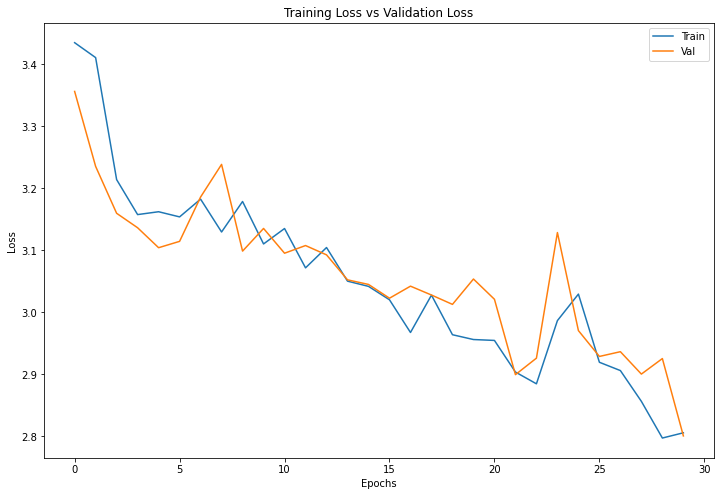

In [ ]:
fig, axs = plt.subplots(figsize=(12,8))

axs.plot(history.history['loss'])
axs.plot(history.history['val_loss'])
axs.title.set_text('Training Loss vs Validation Loss')
axs.set_xlabel('Epochs')
axs.set_ylabel('Loss')
axs.legend(['Train','Val'])

plt.show()

In [ ]:
model.evaluate(X_test, y_test)

7/7 [==============================] - 2s 89ms/step - loss: 2.8009 - dense_9_loss: 1.7844 - dense_6_loss: 1.6509 - dense_8_loss: 1.7374 - dense_9_accuracy: 0.3084 - dense_6_accuracy: 0.3879 - dense_8_accuracy: 0.3645


[2.8008506298065186,
 1.7843737602233887,
 1.6508854627609253,
 1.7373706102371216,
 0.30841121077537537,
 0.38785046339035034,
 0.3644859790802002]